Station data acquired from https://dd.weather.gc.ca/climate/observations/hourly/csv/BC/

In [3]:
import numpy as np
import xarray as xr
import pandas as pd
from glob import glob

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
# Constants

FIRST_YEAR = 1999
LAST_YEAR = 2023
N_YEARS = LAST_YEAR - FIRST_YEAR + 1
N = 365 * 24 * N_YEARS + 6 * 24   # 24 extra hours for 6 leap years
COVERAGE_THRESHOLD = 0.9
ZSCORE_THRESHOLD = 4
vars = [
    "Temp (°C)",
    "Wind Spd (km/h)",
    "Stn Press (kPa)",
    "Rel Hum (%)",
    "Dew Point Temp (°C)",
]

In [5]:
# Takes ~5 minutes to run

wx_data_fnames = sorted(glob("/users/rpayne/data/unproc/STN_ECCC/hourly/climate_hourly_BC_*.csv"))
df = pd.concat(
    (pd.read_csv(f, encoding='latin1') for f in wx_data_fnames),
    ignore_index=True
)
df['Date/Time (LST)'] = pd.to_datetime(df['Date/Time (LST)'], format='%Y-%m-%d %H:%M')
FIRST_YEAR = 1999
LAST_YEAR = 2023
df = df[df['Date/Time (LST)'].dt.year >= FIRST_YEAR]  # Filter for data after FIRST_YEAR
df = df[df['Date/Time (LST)'].dt.year <= LAST_YEAR]  # Filter for data before LAST_YEAR
df.set_index('Date/Time (LST)', inplace=True)
df

/tmp/ipykernel_2083838/1808808491.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Longitude (x)  Latitude (y)      Station Name Climate ID  \
Date/Time (LST)                                                                 
2007-11-27 08:00:00        -123.72         48.82    NORTH COWICHAN    1015630   
2007-11-27 09:00:00        -123.72         48.82    NORTH COWICHAN    1015630   
2007-11-27 10:00:00        -123.72         48.82    NORTH COWICHAN    1015630   
2007-11-27 11:00:00        -123.72         48.82    NORTH COWICHAN    1015630   
2007-11-27 12:00:00        -123.72         48.82    NORTH COWICHAN    1015630   
...                            ...           ...               ...        ...   
2023-12-31 19:00:00        -130.03         58.43  DEASE LAKE (AUT)    119BLM0   
2023-12-31 20:00:00        -130.03         58.43  DEASE LAKE (AUT)    119BLM0   
2023-12-31 21:00:00        -130.03         58.43  DEASE LAKE (AUT)    119BLM0   
2023-12-31 22:00:00        -130.03         58.43  DEASE LAKE (AUT)    119BLM0   
2023-12-31 23:00:00        -130.03         58.43  DEASE LAKE (AUT)    119BLM0   

                     Year Month Day Time (LST) Flag  Temp (°C)  ...  \
Date/Time (LST)                                                 ...   
2007-11-27 08:00:00  2007    11  27      08:00  NaN       -2.4  ...   
2007-11-27 09:00:00  2007    11  27      09:00  NaN       -1.1  ...   
2007-11-27 10:00:00  2007    11  27      10:00  NaN        1.4  ...   
2007-11-27 11:00:00  2007    11  27      11:00  NaN        4.5  ...   
2007-11-27 12:00:00  2007    11  27      12:00  NaN        4.5  ...   
...                   ...   ...  ..        ...  ...        ...  ...   
2023-12-31 19:00:00  2023    12  31      19:00  NaN      -11.1  ...   
2023-12-31 20:00:00  2023    12  31      20:00  NaN      -11.5  ...   
2023-12-31 21:00:00  2023    12  31      21:00  NaN      -11.7  ...   
2023-12-31 22:00:00  2023    12  31      22:00  NaN      -11.8  ...   
2023-12-31 23:00:00  2023    12  31      23:00  NaN      -11.7  ...   

                    Wind Spd Flag  Visibility (km) Visibility Flag  \
Date/Time (LST)                                                      
2007-11-27 08:00:00           NaN              NaN             NaN   
2007-11-27 09:00:00           NaN              NaN             NaN   
2007-11-27 10:00:00           NaN              NaN             NaN   
2007-11-27 11:00:00           NaN              NaN             NaN   
2007-11-27 12:00:00           NaN              NaN             NaN   
...                           ...              ...             ...   
2023-12-31 19:00:00           NaN              NaN             NaN   
2023-12-31 20:00:00           NaN              NaN             NaN   
2023-12-31 21:00:00           NaN              NaN             NaN   
2023-12-31 22:00:00           NaN              NaN             NaN   
2023-12-31 23:00:00           NaN              NaN             NaN   

                     Stn Press (kPa) Stn Press Flag Hmdx Hmdx Flag  \
Date/Time (LST)                                                      
2007-11-27 08:00:00              NaN              M  NaN       NaN   
2007-11-27 09:00:00              NaN              M  NaN       NaN   
2007-11-27 10:00:00              NaN              M  NaN       NaN   
2007-11-27 11:00:00              NaN              M  NaN       NaN   
2007-11-27 12:00:00              NaN              M  NaN       NaN   
...                              ...            ...  ...       ...   
2023-12-31 19:00:00            92.30            NaN  NaN       NaN   
2023-12-31 20:00:00            92.32            NaN  NaN       NaN   
2023-12-31 21:00:00            92.32            NaN  NaN       NaN   
2023-12-31 22:00:00            92.32            NaN  NaN       NaN   
2023-12-31 23:00:00            92.32            NaN  NaN       NaN   

                     Wind Chill Wind Chill Flag  Weather  
Date/Time (LST)                                           
2007-11-27 08:00:00         NaN             NaN      NaN  
2007-11-27 09:00:00         NaN             

In [6]:
# Create a dictionary mapping station name to (lat, lon) from df
stn_latlon = {}
stns = df["Station Name"].unique()
for stn in stns:
    stn_rows = df[df["Station Name"] == stn]
    if not stn_rows.empty:
        lat = stn_rows["Latitude (y)"].iloc[0]
        lon = stn_rows["Longitude (x)"].iloc[0]
        stn_latlon[stn] = (lat, lon)
    else:
        stn_latlon[stn] = (None, None)


def get_stn(stn_name, data=df):
    stn = data[data["Station Name"] == stn_name]
    return stn.sort_index()

In [7]:
# Define a function that rejects any data with a z-score >= to some threshold.

def plot_data_dist(data, varname=None, lower_bound=-1e10, upper_bound=1e10):
    """
    Plots the distribution of the given data.
    """

    mu = data.mean()
    sigma = data.std(ddof=1)

    plt.figure(figsize=(4, 3))
    plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
    if (mu + ZSCORE_THRESHOLD * sigma < upper_bound):
        plt.axvline(x=mu + ZSCORE_THRESHOLD * sigma, color='red', linestyle='--', lw=.5)
    if (mu - ZSCORE_THRESHOLD * sigma > lower_bound):
        plt.axvline(x=mu - ZSCORE_THRESHOLD * sigma, color='red', linestyle='--', lw=.5)
    plt.title('Distribution' if varname is None else f'Distribution of {varname}')
    plt.xlabel(f'{varname}' if varname else 'Data Values')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=.2, linestyle='--')
    plt.show()

def reject_outliers(data, threshold=ZSCORE_THRESHOLD):
    """
    Rejects outliers in the data based on z-score threshold.
    """
    mu = data.mean()
    sigma = data.std(ddof=1)
    z_scores = (data - mu) / sigma
    return data.where(np.abs(z_scores) < threshold)

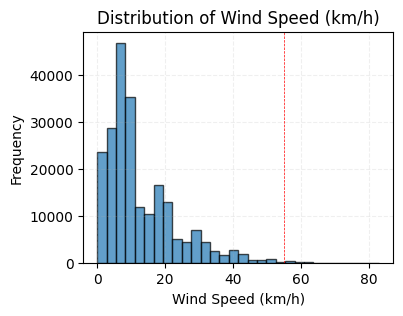

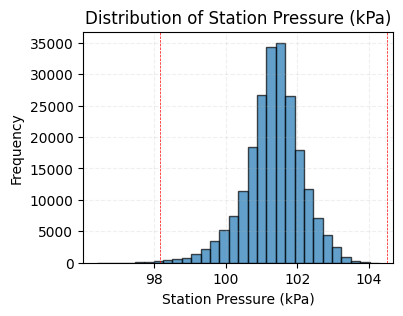

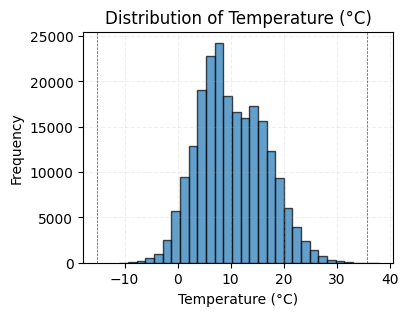

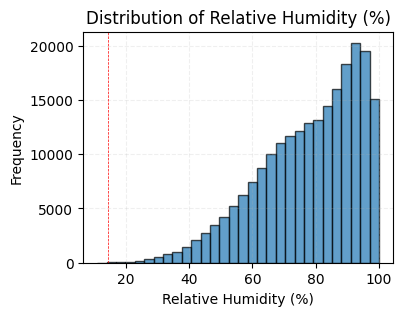

In [8]:
data = get_stn("COMOX A")
data_ws = data["Wind Spd (km/h)"]
data_pres = data["Stn Press (kPa)"]
data_temp = data["Temp (°C)"]
data_rh = data["Rel Hum (%)"]
plot_data_dist(data_ws, varname="Wind Speed (km/h)", lower_bound=0)
plot_data_dist(data_pres, varname="Station Pressure (kPa)")
plot_data_dist(data_temp, varname="Temperature (°C)")
plot_data_dist(data_rh, varname="Relative Humidity (%)", lower_bound=0, upper_bound=100)

In [9]:
# REMOVE OUTLIERS
for var in vars:
    df[var] = reject_outliers(df[var], threshold=ZSCORE_THRESHOLD)

In [10]:
WS_coverage_dict = {}
RH_coverage_dict = {}
P_coverage_dict = {}
T_coverage_dict = {}
Td_coverage_dict = {}

for i,stn in enumerate(stns):
    print(f"{i+1}/{len(stns)}")
    
    stn_data = get_stn(stn)

    WS_data = stn_data["Wind Spd (km/h)"]
    WS_coverage = np.count_nonzero(~np.isnan(WS_data)) / N
    if WS_coverage >= COVERAGE_THRESHOLD:
        WS_coverage_dict[stn] = WS_coverage

    RH_data = stn_data["Rel Hum (%)"]
    RH_coverage = np.count_nonzero(~np.isnan(RH_data)) / N
    if RH_coverage >= COVERAGE_THRESHOLD:
        RH_coverage_dict[stn] = RH_coverage

    T_data = stn_data["Temp (°C)"]
    T_coverage = np.count_nonzero(~np.isnan(T_data)) / N
    if T_coverage >= COVERAGE_THRESHOLD:
        T_coverage_dict[stn] = T_coverage

    Td_data = stn_data["Dew Point Temp (°C)"]
    Td_coverage = np.count_nonzero(~np.isnan(Td_data)) / N
    if Td_coverage >= COVERAGE_THRESHOLD:
        Td_coverage_dict[stn] = Td_coverage

    P_data = stn_data["Stn Press (kPa)"]
    P_coverage = np.count_nonzero(~np.isnan(P_data)) / N
    if P_coverage >= COVERAGE_THRESHOLD:
        P_coverage_dict[stn] = P_coverage

1/126
2/126
3/126
4/126
5/126
6/126
7/126
8/126
9/126
10/126
11/126
12/126
13/126
14/126
15/126
16/126
17/126
18/126
19/126
20/126
21/126
22/126
23/126
24/126
25/126
26/126
27/126
28/126
29/126
30/126
31/126
32/126
33/126
34/126
35/126
36/126
37/126
38/126
39/126
40/126
41/126
42/126
43/126
44/126
45/126
46/126
47/126
48/126
49/126
50/126
51/126
52/126
53/126
54/126
55/126
56/126
57/126
58/126
59/126
60/126
61/126
62/126
63/126
64/126
65/126
66/126
67/126
68/126
69/126
70/126
71/126
72/126
73/126
74/126
75/126
76/126
77/126
78/126
79/126
80/126
81/126
82/126
83/126
84/126
85/126
86/126
87/126
88/126
89/126
90/126
91/126
92/126
93/126
94/126
95/126
96/126
97/126
98/126
99/126
100/126
101/126
102/126
103/126
104/126
105/126
106/126
107/126
108/126
109/126
110/126
111/126
112/126
113/126
114/126
115/126
116/126
117/126
118/126
119/126
120/126
121/126
122/126
123/126
124/126
125/126
126/126


In [ ]:
q_stns_A = set(RH_coverage_dict.keys()) & set(T_coverage_dict.keys()) & set(P_coverage_dict.keys())
q_stns_B = set(Td_coverage_dict.keys()) & set(P_coverage_dict.keys())
print(f"Number of stations with adequate (RH, T, and P) coverage: {len(q_stns_A)}")
print(f"Number of stations with adequate (Td and P) coverage: {len(q_stns_B)}")
print(f"Number of stations with both adequate (RH, T, P) and (Td, P) coverage: {len(q_stns_A & q_stns_B)}")

q_stns_A = list(q_stns_A)
q_stns_B = list(q_stns_B)

Number of stations with adequate (RH, T, and P) coverage: 20
Number of stations with adequate (Td and P) coverage: 20
Number of stations with both adequate (RH, T, P) and (Td, P) coverage: 20


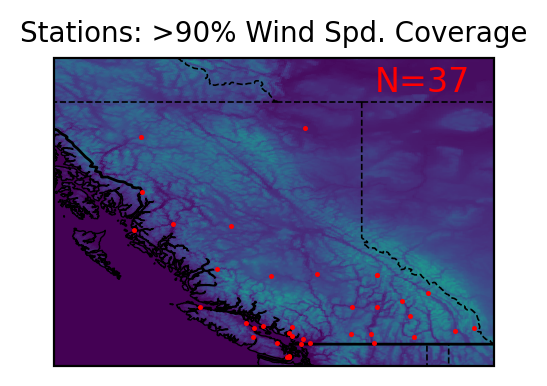

In [19]:
topography_hr = xr.open_dataset("/users/rpayne/data/topography/hr/HGT_orig.nc")
lon = topography_hr['XLONG'].squeeze()
lat = topography_hr['XLAT'].squeeze()
hgt = topography_hr['HGT'].squeeze()

# Create a figure
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()},figsize=(4,2),dpi=200)

# Plot using pcolormesh
mesh = ax.pcolormesh(lon, lat, hgt, transform=ccrs.PlateCarree(), shading='auto')
ax.add_feature(cfeature.BORDERS, linewidth=1)   # Country borders
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)
for stn in WS_coverage_dict.keys():
    lat, lon = stn_latlon[stn]
    ax.plot(lon, lat, marker='o', color='red', markersize=.8, transform=ccrs.PlateCarree())
ax.set_xlim(-134, -114)
ax.set_ylim(48, 62)
ax.text(-119.4, 60.5, f"N={len(WS_coverage_dict.keys())}", fontsize=12, transform=ccrs.PlateCarree(), color='red')

# Add coastlines and colorbar
ax.coastlines(linewidth=0.5)

ax.set_title(f"Stations: >{100*COVERAGE_THRESHOLD:.0f}% Wind Spd. Coverage", fontsize=10)
plt.show()

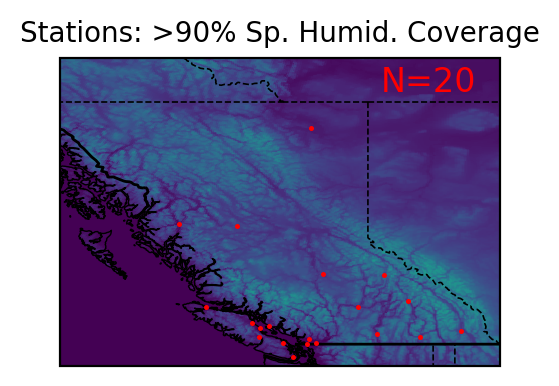

In [20]:
topography_hr = xr.open_dataset("/users/rpayne/data/topography/hr/HGT_orig.nc")
lon = topography_hr['XLONG'].squeeze()
lat = topography_hr['XLAT'].squeeze()
hgt = topography_hr['HGT'].squeeze()

# Create a figure
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()},figsize=(4,2),dpi=200)

# Plot using pcolormesh
mesh = ax.pcolormesh(lon, lat, hgt, transform=ccrs.PlateCarree(), shading='auto')
ax.add_feature(cfeature.BORDERS, linewidth=1)   # Country borders
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)
for stn in q_stns_A:
    lat, lon = stn_latlon[stn]
    ax.plot(lon, lat, marker='o', color='red', markersize=.8, transform=ccrs.PlateCarree())
ax.set_xlim(-134, -114)
ax.set_ylim(48, 62)
ax.text(-119.4, 60.5, f"N={len(q_stns_A)}", fontsize=12, transform=ccrs.PlateCarree(), color='red')

# Add coastlines and colorbar
ax.coastlines(linewidth=0.5)

ax.set_title(f"Stations: >{100*COVERAGE_THRESHOLD:.0f}% Sp. Humid. Coverage", fontsize=10)
plt.show()

Plotting for BLUE RIVER CS (1/20)
Plotting for CAMPBELL RIVER A (2/20)
Plotting for REVELSTOKE A (3/20)
Plotting for NANAIMO A (4/20)
Plotting for VICTORIA HARBOUR A (5/20)
Plotting for POWELL RIVER A (6/20)
Plotting for PENTICTON A (7/20)
Plotting for FORT NELSON A (8/20)
Plotting for CRANBROOK A (9/20)
Plotting for WHITE ROCK CAMPBELL SCIENTIFIC (10/20)
Plotting for CASTLEGAR A (11/20)
Plotting for PORT HARDY A (12/20)
Plotting for ABBOTSFORD A (13/20)
Plotting for PORT ALBERNI (AUT) (14/20)
Plotting for PITT MEADOWS CS (15/20)
Plotting for BURNS LAKE DECKER LAKE (16/20)
Plotting for KAMLOOPS A (17/20)
Plotting for TERRACE A (18/20)
Plotting for WILLIAMS LAKE A (19/20)
Plotting for COMOX A (20/20)


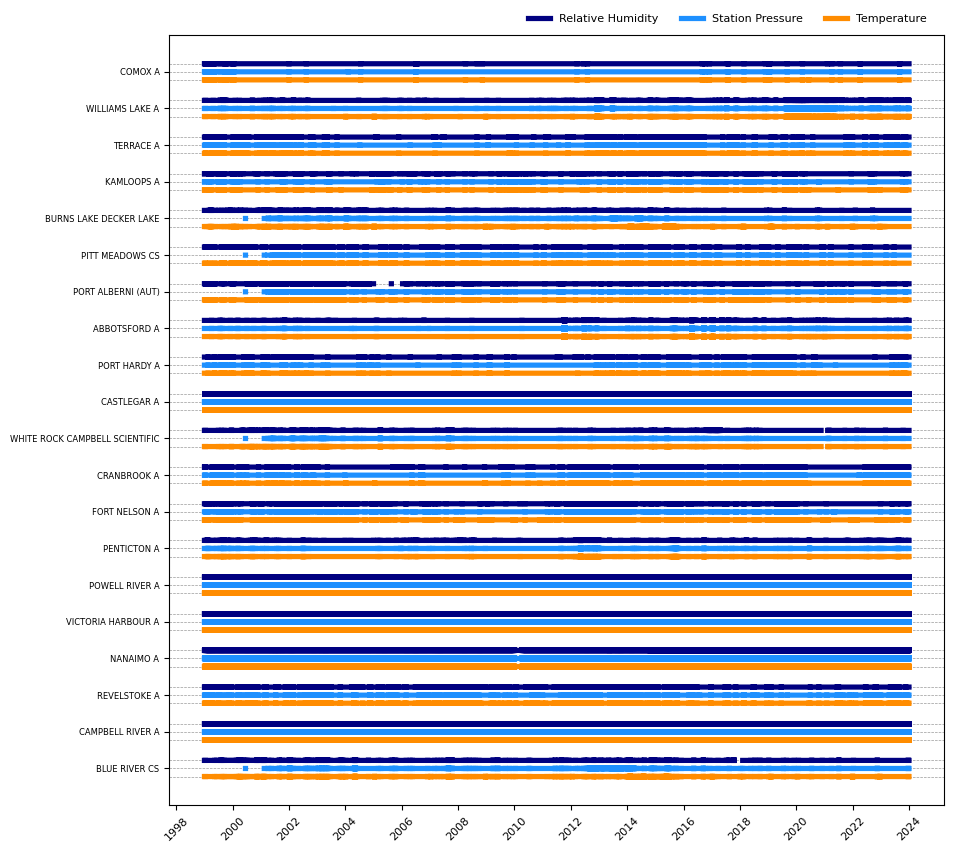

In [14]:
plt.figure(figsize=(10, 10))
plt.yticks(np.arange(len(q_stns_A)), q_stns_A, fontsize=6)
plt.ylim(-1, len(q_stns_A))
plt.xticks(
    ticks=pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS'),
    labels=[str(y.year) for y in pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS')],
    rotation=45,
    fontsize=8
)
colors = ["navy", "dodgerblue", "darkorange"]

di = .22
lw = 3.75
for i,stn in enumerate(q_stns_A):
    print(f"Plotting for {stn} ({i+1}/{len(q_stns_A)})")

    stn_data = get_stn(stn)
    rh = stn_data["Rel Hum (%)"]
    pres = stn_data["Stn Press (kPa)"]
    temp = stn_data["Temp (°C)"]
    rh = rh.where(rh.isna(), i+di)
    pres = pres.where(pres.isna(), i)
    temp = temp.where(temp.isna(), i-di)

    plt.axhline(y=i, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    plt.axhline(y=i+di, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    plt.axhline(y=i-di, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    if i == 0:
        plt.plot(rh.index, rh, drawstyle='steps-post', linewidth=lw, color=colors[0], label='Relative Humidity')
        plt.plot(pres.index, pres, drawstyle='steps-post', linewidth=lw, color=colors[1], label='Station Pressure')
        plt.plot(temp.index, temp, drawstyle='steps-post', linewidth=lw, color=colors[2], label='Temperature')
    else:
        plt.plot(rh.index, rh, drawstyle='steps-post', linewidth=lw, color=colors[0])
        plt.plot(pres.index, pres, drawstyle='steps-post', linewidth=lw, color=colors[1])
        plt.plot(temp.index, temp, drawstyle='steps-post', linewidth=lw, color=colors[2])

plt.legend(loc='upper left', fontsize=8, ncol=3, bbox_to_anchor=(0.45, 1.04), frameon=False)
# plt.tight_layout()
plt.show()

Plotting for BLUE RIVER CS (1/20)
Plotting for CAMPBELL RIVER A (2/20)
Plotting for REVELSTOKE A (3/20)
Plotting for NANAIMO A (4/20)
Plotting for VICTORIA HARBOUR A (5/20)
Plotting for POWELL RIVER A (6/20)
Plotting for PENTICTON A (7/20)
Plotting for FORT NELSON A (8/20)
Plotting for CRANBROOK A (9/20)
Plotting for WHITE ROCK CAMPBELL SCIENTIFIC (10/20)
Plotting for CASTLEGAR A (11/20)
Plotting for PORT HARDY A (12/20)
Plotting for ABBOTSFORD A (13/20)
Plotting for PORT ALBERNI (AUT) (14/20)
Plotting for PITT MEADOWS CS (15/20)
Plotting for BURNS LAKE DECKER LAKE (16/20)
Plotting for KAMLOOPS A (17/20)
Plotting for TERRACE A (18/20)
Plotting for WILLIAMS LAKE A (19/20)
Plotting for COMOX A (20/20)


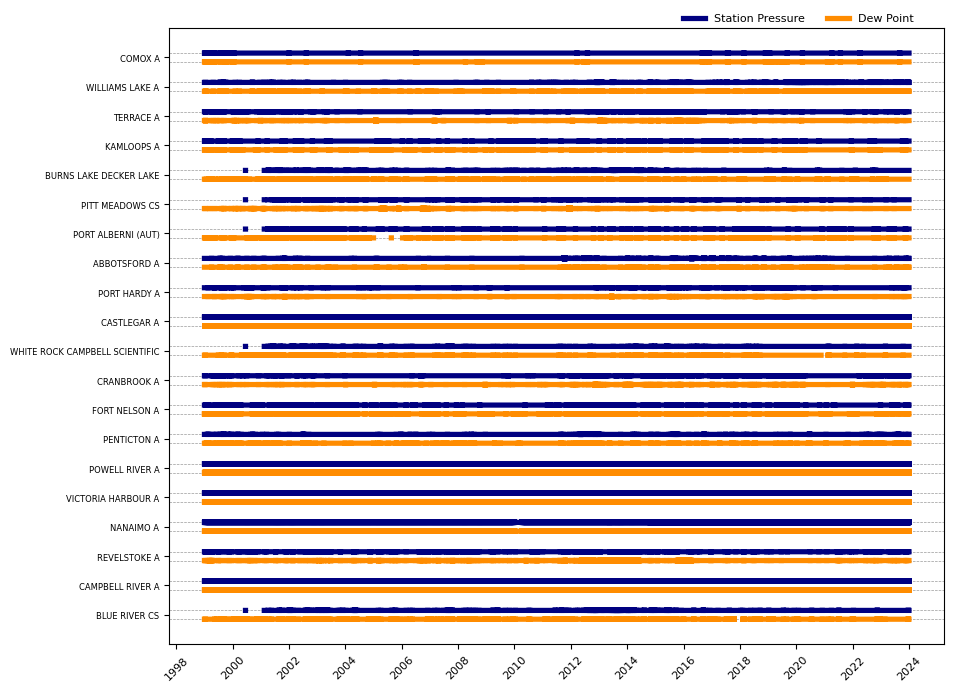

In [15]:
plt.figure(figsize=(10, 8))
plt.yticks(np.arange(len(q_stns_A)), q_stns_A, fontsize=6)
plt.ylim(-1, len(q_stns_A))
plt.xticks(
    ticks=pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS'),
    labels=[str(y.year) for y in pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS')],
    rotation=45,
    fontsize=8
)
colors = ["navy", "dodgerblue", "darkorange"]

di = .15
lw = 3.75
for i,stn in enumerate(q_stns_A):
    print(f"Plotting for {stn} ({i+1}/{len(q_stns_A)})")

    stn_data = get_stn(stn)
    pres = stn_data["Stn Press (kPa)"]
    dewtemp = stn_data["Dew Point Temp (°C)"]
    pres = pres.where(pres.isna(), i+di)
    dewtemp = dewtemp.where(dewtemp.isna(), i-di)

    plt.axhline(y=i+di, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    plt.axhline(y=i-di, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    if i == 0:
        plt.plot(pres.index, pres, drawstyle='steps-post', linewidth=lw, color=colors[0], label='Station Pressure')
        plt.plot(dewtemp.index, dewtemp, drawstyle='steps-post', linewidth=lw, color=colors[2], label='Dew Point')
    else:
        plt.plot(pres.index, pres, drawstyle='steps-post', linewidth=lw, color=colors[0])
        plt.plot(dewtemp.index, dewtemp, drawstyle='steps-post', linewidth=lw, color=colors[2])

plt.legend(loc='upper left', fontsize=8, ncol=3, bbox_to_anchor=(0.65, 1.04), frameon=False)
# plt.tight_layout()
plt.show()

Plotting Dew Point Temp (°C) for VICTORIA UNIVERSITY CS (1/30)
Plotting Dew Point Temp (°C) for VICTORIA GONZALES CS (2/30)


/users/rpayne/venv/general/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


Plotting Dew Point Temp (°C) for VICTORIA HARBOUR A (3/30)
Plotting Dew Point Temp (°C) for CAMPBELL RIVER A (4/30)
Plotting Dew Point Temp (°C) for COMOX A (5/30)
Plotting Dew Point Temp (°C) for NANAIMO A (6/30)
Plotting Dew Point Temp (°C) for PORT HARDY A (7/30)
Plotting Dew Point Temp (°C) for PORT ALBERNI (AUT) (8/30)
Plotting Dew Point Temp (°C) for POWELL RIVER A (9/30)
Plotting Dew Point Temp (°C) for SQUAMISH AIRPORT (10/30)
Plotting Dew Point Temp (°C) for TERRACE A (11/30)
Plotting Dew Point Temp (°C) for PEMBERTON AIRPORT CS (12/30)
Plotting Dew Point Temp (°C) for PUNTZI MOUNTAIN (AUT) (13/30)
Plotting Dew Point Temp (°C) for BURNS LAKE DECKER LAKE (14/30)
Plotting Dew Point Temp (°C) for WILLIAMS LAKE A (15/30)
Plotting Dew Point Temp (°C) for ABBOTSFORD A (16/30)
Plotting Dew Point Temp (°C) for PITT MEADOWS CS (17/30)
Plotting Dew Point Temp (°C) for WEST VANCOUVER AUT (18/30)
Plotting Dew Point Temp (°C) for WHITE ROCK CAMPBELL SCIENTIFIC (19/30)
Plotting Dew Point Te

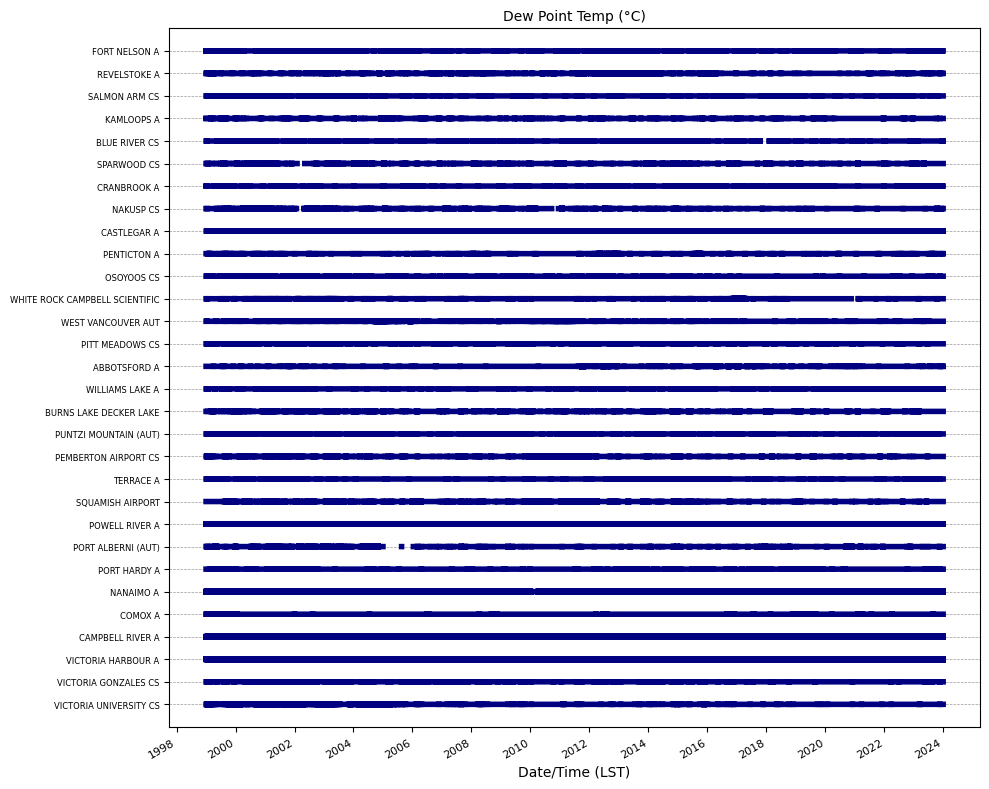

In [16]:
plt.figure(figsize=(10, 8))
plt.yticks(np.arange(len(Td_coverage_dict.keys())), Td_coverage_dict.keys(), fontsize=6)
plt.ylim(-1, len(Td_coverage_dict.keys()))
plt.xticks(
    ticks=pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS'),
    labels=[str(y.year) for y in pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS')],
    rotation=45,
    fontsize=8
)
color = ["navy", "darkorange"]

var = "Dew Point Temp (°C)"
for i,stn in enumerate(Td_coverage_dict.keys()):
    print(f"Plotting {var} for {stn} ({i+1}/{len(Td_coverage_dict.keys())})")
    data = get_stn(stn)[var]
    data = data.where(data.isna(), i)
    plt.axhline(y=i, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    data.plot(ax=plt.gca(), label=stn, drawstyle='steps-post', linewidth=4, color='navy')

plt.title(f"{var}", fontsize=10)
plt.tight_layout()
plt.show()

Plotting Wind Spd (km/h) for VICTORIA UNIVERSITY CS (1/37)
Plotting Wind Spd (km/h) for VICTORIA GONZALES CS (2/37)


/users/rpayne/venv/general/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


Plotting Wind Spd (km/h) for VICTORIA HARBOUR A (3/37)
Plotting Wind Spd (km/h) for CAMPBELL RIVER A (4/37)
Plotting Wind Spd (km/h) for COMOX A (5/37)
Plotting Wind Spd (km/h) for NANAIMO A (6/37)
Plotting Wind Spd (km/h) for PORT HARDY A (7/37)
Plotting Wind Spd (km/h) for PORT ALBERNI (AUT) (8/37)
Plotting Wind Spd (km/h) for HOWE SOUND - PAM ROCKS (9/37)
Plotting Wind Spd (km/h) for POWELL RIVER A (10/37)
Plotting Wind Spd (km/h) for SQUAMISH AIRPORT (11/37)
Plotting Wind Spd (km/h) for BELLA COOLA A (12/37)
Plotting Wind Spd (km/h) for HOLLAND ROCK (13/37)
Plotting Wind Spd (km/h) for STEWART A (14/37)
Plotting Wind Spd (km/h) for TERRACE A (15/37)
Plotting Wind Spd (km/h) for PUNTZI MOUNTAIN (AUT) (16/37)
Plotting Wind Spd (km/h) for BURNS LAKE DECKER LAKE (17/37)
Plotting Wind Spd (km/h) for WILLIAMS LAKE A (18/37)
Plotting Wind Spd (km/h) for ABBOTSFORD A (19/37)
Plotting Wind Spd (km/h) for PITT MEADOWS CS (20/37)
Plotting Wind Spd (km/h) for WEST VANCOUVER AUT (21/37)
Plottin

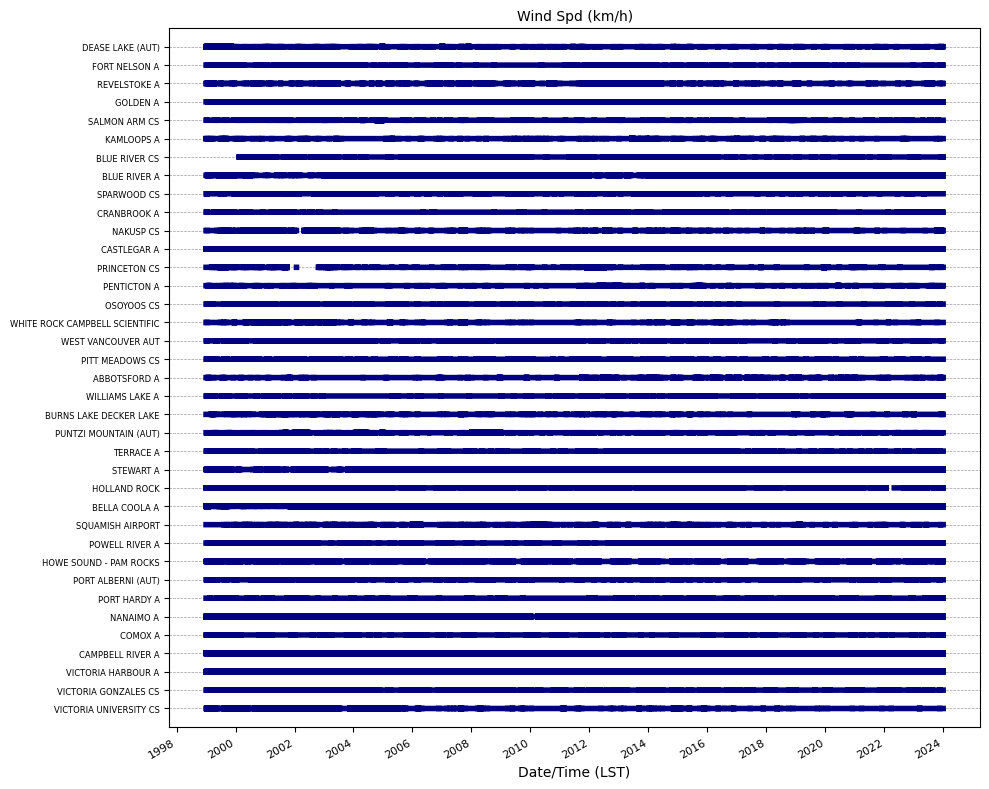

In [17]:
plt.figure(figsize=(10, 8))
plt.yticks(np.arange(len(WS_coverage_dict.keys())), WS_coverage_dict.keys(), fontsize=6)
plt.ylim(-1, len(WS_coverage_dict.keys()))
plt.xticks(
    ticks=pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS'),
    labels=[str(y.year) for y in pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS')],
    rotation=45,
    fontsize=8
)
color = ["navy", "darkorange"]

var = "Wind Spd (km/h)"
for i,stn in enumerate(WS_coverage_dict.keys()):
    print(f"Plotting {var} for {stn} ({i+1}/{len(WS_coverage_dict.keys())})")
    data = get_stn(stn)[var]
    data = data.where(data.isna(), i)
    plt.axhline(y=i, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    data.plot(ax=plt.gca(), label=stn, drawstyle='steps-post', linewidth=4, color="navy")

plt.title(f"{var}", fontsize=10)
plt.tight_layout()
plt.show()

Plotting 1/37
Plotting 2/37
Plotting 3/37
Plotting 4/37
Plotting 5/37
Plotting 6/37
Plotting 7/37
Plotting 8/37
Plotting 9/37
Plotting 10/37
Plotting 11/37
Plotting 12/37
Plotting 13/37
Plotting 14/37
Plotting 15/37
Plotting 16/37
Plotting 17/37
Plotting 18/37
Plotting 19/37
Plotting 20/37
Plotting 21/37
Plotting 22/37
Plotting 23/37
Plotting 24/37
Plotting 25/37
Plotting 26/37
Plotting 27/37
Plotting 28/37
Plotting 29/37
Plotting 30/37
Plotting 31/37
Plotting 32/37
Plotting 33/37
Plotting 34/37
Plotting 35/37
Plotting 36/37
Plotting 37/37


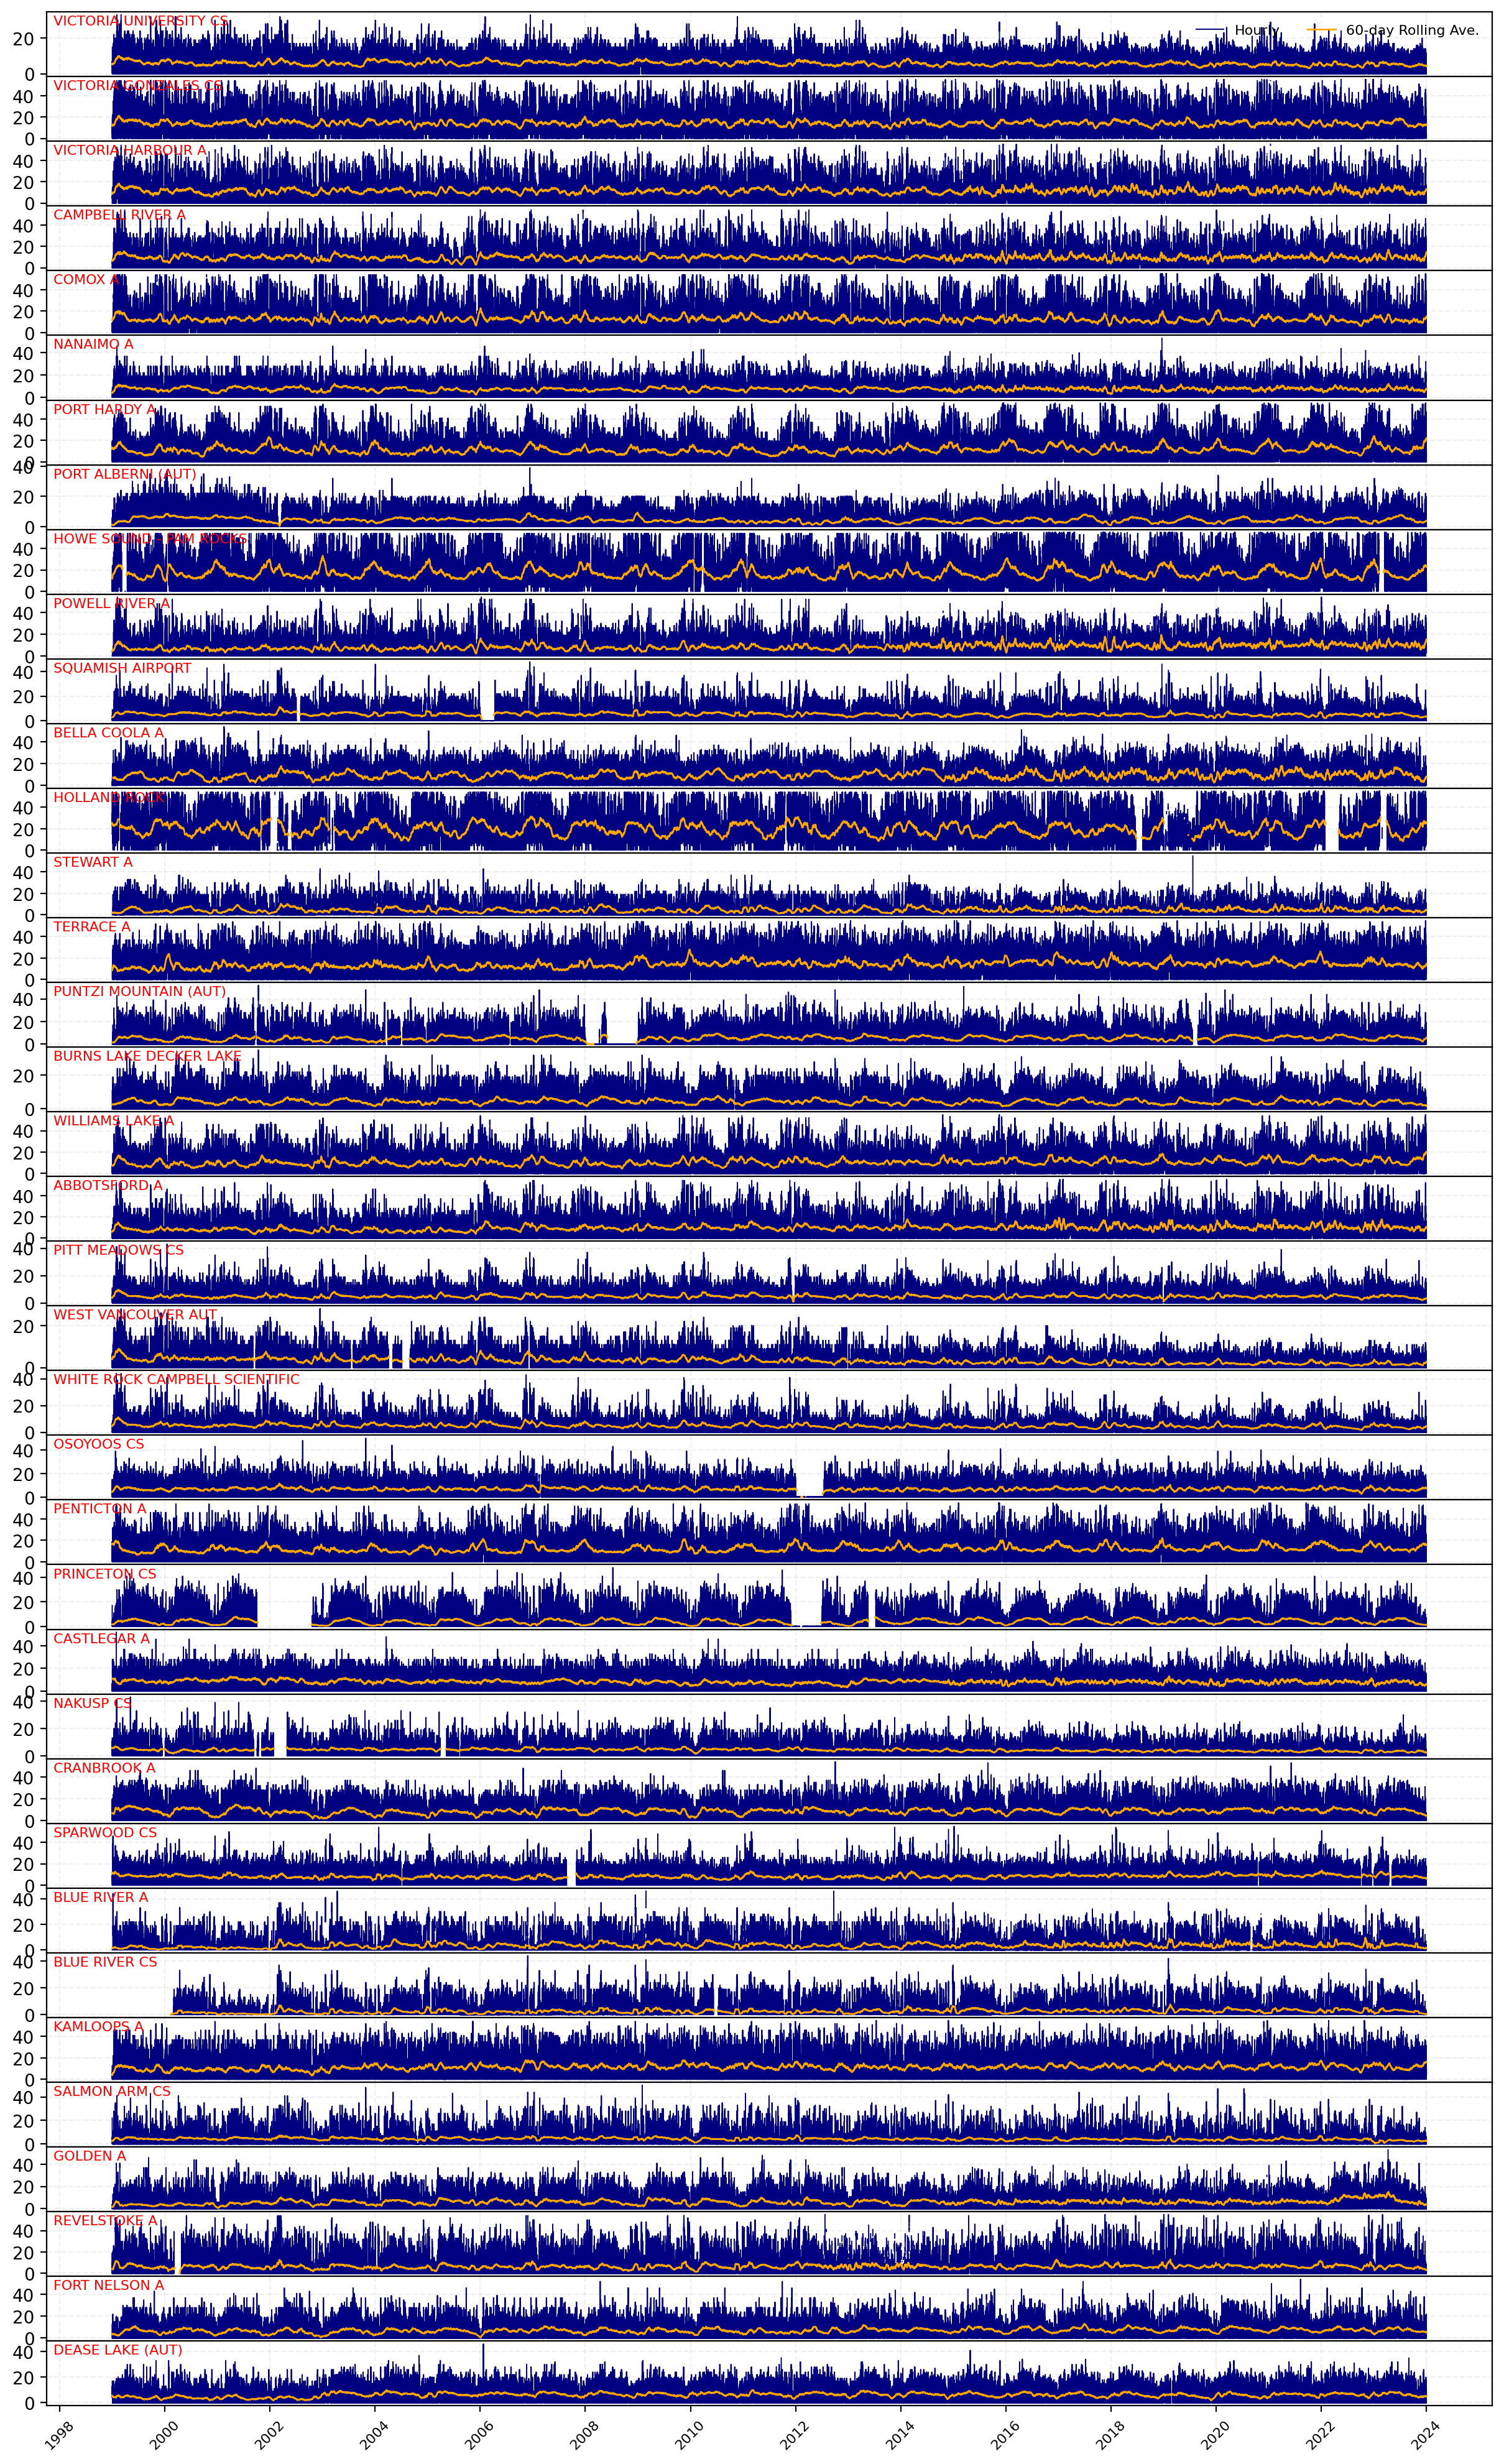

In [24]:
fig, axes = plt.subplots(ncols=1, nrows=len(WS_coverage_dict.keys()), figsize=(15, 25), sharex=True, dpi=200)
plt.subplots_adjust(hspace=0)
for i,ax in enumerate(axes):
    print(f"Plotting {i+1}/{len(WS_coverage_dict.keys())}")
    ax.set_xticks(
        ticks=pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS'),
        labels=[str(y.year) for y in pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS')],
        rotation=45,
        fontsize=8
    )
    ax.set_yticks(np.arange(0,80,20))
    ax.grid(True, alpha=.2, linestyle='--')
    stn = list(WS_coverage_dict.keys())[i]
    stn_data = get_stn(stn)
    stn_data_rolling = stn_data['Wind Spd (km/h)'].rolling(window=24*30*1, center=True, min_periods=24*10).mean()
    ax.plot(stn_data.index, stn_data["Wind Spd (km/h)"], label="Hourly", color="navy", lw=.7)
    ax.plot(stn_data_rolling.index, stn_data_rolling, label=f"60-day Rolling Ave.", color="orange", lw=1.)
    ax.text(0.005, 0.95, stn, transform=ax.transAxes, fontsize=8, color='red', ha='left', va='top')
    if i == 0:
        ax.legend(loc='upper right', fontsize=8, ncol=2, frameon=False)
    if i < len(WS_coverage_dict.keys()) - 1:
        ax.set_xticklabels([])
plt.show()